In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
%matplotlib inline

import pylab
import scipy.stats as st

## Importing the data

In [52]:
path='D:/DataSets/365/TimeSeries/3/index2018.csv'
path
raw_data=pd.read_csv(path)
df=raw_data.copy()

## Plotting the data

((array([-3.69357572, -3.46171913, -3.33410335, ...,  3.33410335,
          3.46171913,  3.69357572]),
  array([ 438.92    ,  441.49    ,  441.96    , ..., 2839.253031,
         2853.528411, 2872.867839])),
 (476.46056102841203, 1288.1275420815123, 0.9767273150948816))

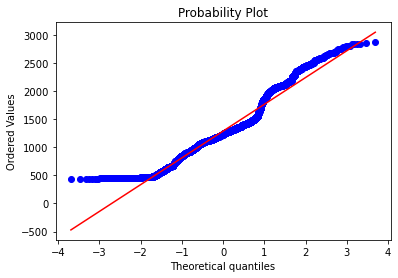

In [53]:
st.probplot(df.spx,plot=pylab)

To keyword plot is None at default, this means, that it will not plot anything. So you must define a plot. In this case, it is pylab. Look at the docu for more options.

The QQ-Plot takes all values a variable can take, and arrange them in ASC order. 
The y-axis is the price/value. the x-axis (theoretical quantiles) are the std from the mean of each value.
The red line shows what the datapoints should follow unter a normal distribution.

In the example, this isn´t the case, since we have more values around 500.
We can not make the forecast we usually use with normal distributed data. But this is a normal status for time series data

## Working with the time

df.date = df['date'] 

In [54]:
df.date.describe()

count           6269
unique          6269
top       17/10/2003
freq               1
Name: date, dtype: object

Each value in the date column, as it is not a date, represent a 1 for python. So each value is a top value, therefore it is completly arbitrary.

In [55]:
df.date=pd.to_datetime(df.date,dayfirst=True)

In [56]:
df.date.describe(datetime_is_numeric=True)

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

## Setting Index

In [57]:
df.set_index('date',inplace=True)

In [58]:
df.index

DatetimeIndex(['1994-01-07', '1994-01-10', '1994-01-11', '1994-01-12',
               '1994-01-13', '1994-01-14', '1994-01-17', '1994-01-18',
               '1994-01-19', '1994-01-20',
               ...
               '2018-01-16', '2018-01-17', '2018-01-18', '2018-01-19',
               '2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25',
               '2018-01-26', '2018-01-29'],
              dtype='datetime64[ns]', name='date', length=6269, freq=None)

In [59]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [60]:
df=df.asfreq('b')

"b" stands for business days. That means, only workingdays excluding weekends and holidays

In [61]:
df.index

DatetimeIndex(['1994-01-07', '1994-01-10', '1994-01-11', '1994-01-12',
               '1994-01-13', '1994-01-14', '1994-01-17', '1994-01-18',
               '1994-01-19', '1994-01-20',
               ...
               '2018-01-16', '2018-01-17', '2018-01-18', '2018-01-19',
               '2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25',
               '2018-01-26', '2018-01-29'],
              dtype='datetime64[ns]', name='date', length=6277, freq='B')

## Handling missing values

In [62]:
df.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

Before to set the frequency on "b", there was even any missing value. After changed the frequency, there are now 8 business days with missing values.
So we need to check for na() even if we did it before, due to our changes on the frequency

With time series data we are using usually three methods: <br>
    - Forward filling --> takes the value from the business day before into the missing value and fill it<br>
    - back filling    --> takes the value from the next business day and fill it into the missing value<br>
    - assigning the same value for all the missing values (bad)<br>
    - using the mean and fill it into (<b>very bad</b>, if we are working with time series data)

In [63]:
#Do not forget to assign it to the column of the dataframe --> df.column=
df.spx=df.spx.fillna(method='ffill')


In [64]:
df.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [65]:
df.ftse=df.ftse.fillna(method='bfill')
df.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [66]:
df.dax=df.dax.fillna(value=df.dax.mean())

<b>First, this is a bad way </b> to fill NA in time series. In this case we are using value, because we also could write value=10.000<br>
So the value which we want to fill is the mean of the dax

In [67]:
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

## Splitting data (Train-test)

In [68]:
del df['dax'], df['ftse'], df['nikkei']

In [70]:
df.describe()

,spx
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


Usually, we shuffle our data before we split them. But with time series data, we can not do that, because it relies on cronological order<br>
Therefore, we split the data at a certain point in time. You can keep the 70/30 or 80/20 rule<br>

We need to use the iloc (index location) method for this. iloc[:1] for instance, are the first two days. So we calculatio the len of the index and multiply it by 0.8 to get the 80%. As it in zero indexed, we do no need to add a +1 for the test sample. look:

In [78]:
size=int(len(df)*.8)
df_train=df.iloc[:size] # Important is the : --> from : to  
df_test=df.iloc[size:]

# You can check with df_train.tail() and df_test.head() that it is correct